In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.simplefilter(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset
diabetes_cleaned_df = pd.read_csv('dataset\diabetes_cleaned.csv')
diabetes_cleaned_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63,0
764,2,122.0,70.0,27,125,36.8,0.340,27,0
765,5,121.0,72.0,23,112,26.2,0.245,30,0
766,1,126.0,60.0,29,125,30.1,0.349,47,1


In [3]:
X = diabetes_cleaned_df.drop(columns='Outcome')
y = diabetes_cleaned_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,  stratify=y)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (614, 8), X_test size: (154, 8)


In [4]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

### Balanced Random Forest Classifier

In [5]:
# Create a random forest classifier
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
brf_model = brf_model.fit(X_train, y_train)
brf_test_predictions = brf_model.predict(X_test)

# Calculated the balanced accuracy score
brf_test_acc_score = accuracy_score(y_test, brf_test_predictions)
print(brf_test_acc_score)

0.7337662337662337


### Easy Ensemble AdaBoost Classifier

In [6]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
ecc_model = eec.fit(X_train, y_train)

In [7]:
ecc_test_predictions = ecc_model.predict(X_test)

# Calculated the balanced accuracy score
ecc_test_acc_score = accuracy_score(y_test, ecc_test_predictions)
print(ecc_test_acc_score)

0.7467532467532467


### Logistic Regression

In [8]:
lr_model = LogisticRegression(random_state=1)
lr_model.fit(X_train, y_train)  
lr_test_predictions = lr_model.predict(X_test)
# Calculated the balanced accuracy score
lr_test_acc_score = accuracy_score(y_test, lr_test_predictions)
print(lr_test_acc_score)

0.7597402597402597


### XG Boost Classifier

In [9]:
regressor = xgb.XGBClassifier()
regressor.fit(X_train, y_train, eval_metric='rmse')
regressor_test_predictions = regressor.predict(X_test)

In [10]:
# Calculated the balanced accuracy score
regressor_test_acc_score = accuracy_score(y_test, regressor_test_predictions)
print(regressor_test_acc_score)

0.7207792207792207


### Test Scores

In [11]:
lst = [
    ['Balanced Random Forest Classifier', brf_test_acc_score], 
    ['Easy Ensemble AdaBoost Classifier', ecc_test_acc_score],
    ['Logistic Regression', lr_test_acc_score],
    ['XG Boost Classifier', regressor_test_acc_score]
]
    
df = pd.DataFrame(lst, columns =['Model', 'Test Score'])
df

,Model,Test Score
0,Balanced Random Forest Classifier,0.733766
1,Easy Ensemble AdaBoost Classifier,0.746753
2,Logistic Regression,0.759740
3,XG Boost Classifier,0.720779


# Model Evaluation

### Confusion Matrix - Balanced Random Forest Classifier

In [12]:
brf_cm = confusion_matrix(y_test, brf_test_predictions)

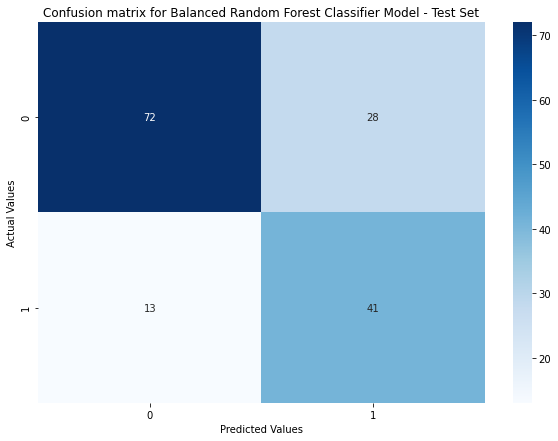

In [13]:
plt.figure(figsize=(10,7))
p = sns.heatmap(brf_cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Balanced Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [14]:
print(classification_report(y_test, brf_test_predictions))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       100
           1       0.59      0.76      0.67        54

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.74       154



### Confusion Matrix - Logistic Regression

In [15]:
lr_cm = confusion_matrix(y_test, lr_test_predictions)

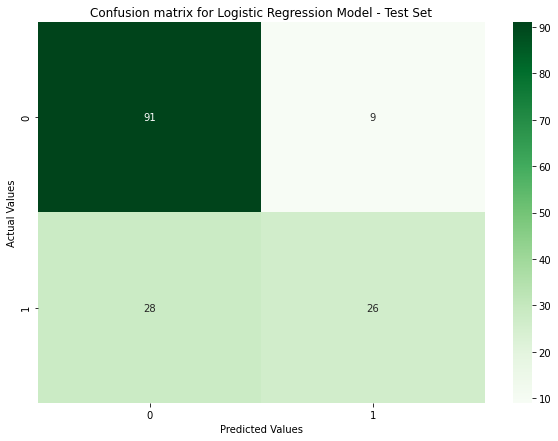

In [16]:
plt.figure(figsize=(10,7))
p = sns.heatmap(lr_cm, annot=True, cmap="Greens", fmt='g')
plt.title('Confusion matrix for Logistic Regression Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [17]:
print(classification_report(y_test, lr_test_predictions))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.74      0.48      0.58        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.76      0.74       154



### Confusion Matrix - Easy Ensemble AdaBoost Classifier

In [18]:
ecc_cm = confusion_matrix(y_test, ecc_test_predictions)

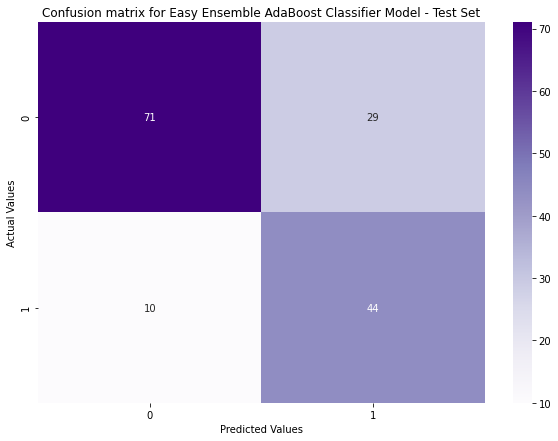

In [19]:
plt.figure(figsize=(10,7))
p = sns.heatmap(ecc_cm, annot=True, cmap="Purples", fmt='g')
plt.title('Confusion matrix for Easy Ensemble AdaBoost Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [20]:
print(classification_report(y_test, ecc_test_predictions))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78       100
           1       0.60      0.81      0.69        54

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.75       154



### Confusion Matrix - XG Boost Classifier

In [21]:
regressor_cm = confusion_matrix(y_test, regressor_test_predictions)

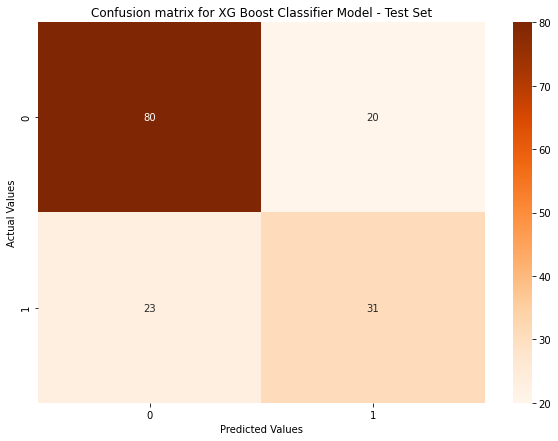

In [22]:
plt.figure(figsize=(10,7))
p = sns.heatmap(regressor_cm, annot=True, cmap="Oranges", fmt='g')
plt.title('Confusion matrix for XG Boost Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [23]:
print(classification_report(y_test, regressor_test_predictions))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.61      0.57      0.59        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



### ROC AUC Curve

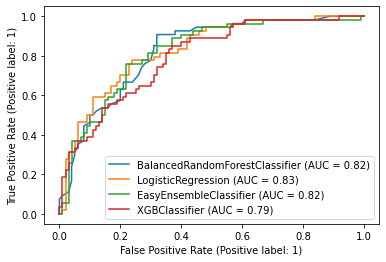

In [24]:
brf_disp = plot_roc_curve(brf_model, X_test, y_test)
lr_disp = plot_roc_curve(lr_model, X_test, y_test, ax=brf_disp.ax_)
ecc_disp = plot_roc_curve(ecc_model, X_test, y_test, ax=brf_disp.ax_)
regressor_disp = plot_roc_curve(regressor, X_test, y_test, ax=brf_disp.ax_)
plt.show()